<a href="https://colab.research.google.com/github/mooniewexx/DL/blob/main/dl_05_1_gymnasium_env.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Введение в RL и пакет Gymnasium

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* https://gymnasium.farama.org/
* https://pypi.org/project/ufal.pybox2d/
* https://gymnasium.farama.org/tutorials/gymnasium_basics/environment_creation/
* https://gymnasium.farama.org/api/spaces/fundamental/
* https://gymnasium.farama.org/environments/toy_text/blackjack/

## Задачи для совместного разбора

1. Рассмотрите пример создания окружения `gymnasium` и основные этапы взаимодействия с этим окружением.
<img src="https://gymnasium.farama.org/_images/AE_loop.png" width="300"/>


   На каждом шаге агент выбирает действие, которое передается в метод `step(action)`. Метод возвращает:
   - `next_state` — след состояние среды,
   - `reward` — награду за совершенное действие,
   - `done` — флаг завершения эпизода,
   - `info` — доп инфу.
   ```python
   action = env.action_space.sample()  # случайное действие
   next_state, reward, done, info = env.step(action)
   ```

In [ ]:
!pip install gymnasium

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 958.1/958.1 kB 9.9 MB/s eta 0:00:00


В `gymnasium` начиная с новых версий (`>=0.26`), метод `step()` возвращает **пять значений** вместо четырёх:  
```python
(next_state, reward, terminated, truncated, info)
```

- **`terminated`**: завершился ли эпизод естественным образом (например, выигрыш/проигрыш).
- **`truncated`**: указывает, был ли эпизод принудительно завершен (например, из-за ограничения по шагам).
- **`info`**: содержит дополнительную информацию о текущем состоянии.


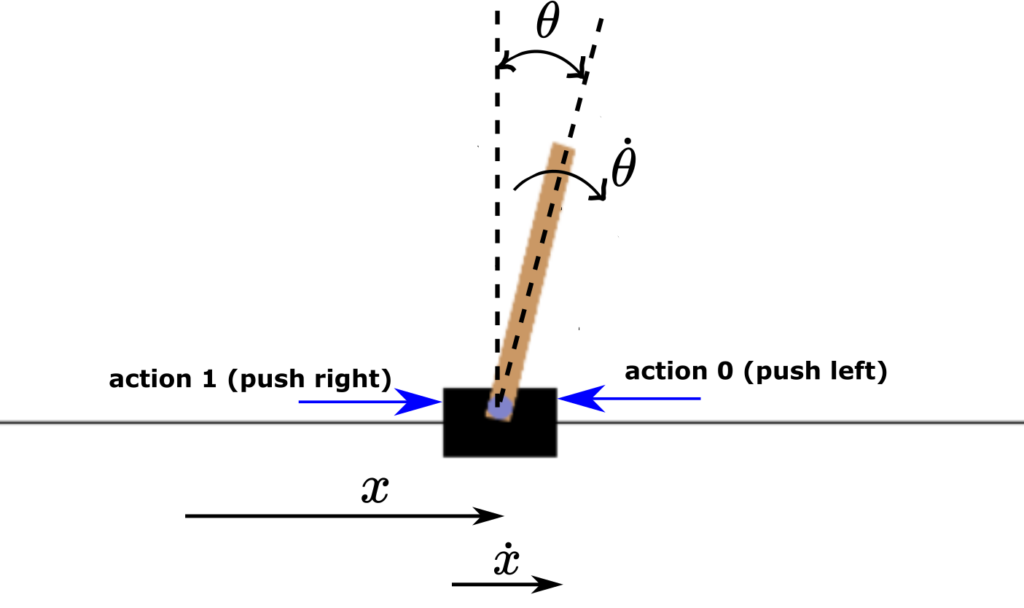

In [ ]:
import gymnasium as gym

env = gym.make('CartPole-v1') # cоздание окружения
state, info = env.reset() # cброс состояния

print(env.action_space) # пространство возможных действий агента
action = env.action_space.sample()
print(action)
print(env.step(action))

Discrete(2)
0
(array([-0.04011932, -0.24139191, -0.02889316,  0.31172806], dtype=float32), 1.0, False, False, {})


In [ ]:
env.reset()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(array([ 0.03564191,  0.006979  , -0.01164795, -0.00372201], dtype=float32),
 {})

В задаче CartPole-v1 состояние представлено массивом из четырех чисел:

`[state[0], state[1], state[2], state[3]]`

где:
- state[0]: положение тележки вдоль оси X,
- state[1]: скорость тележки,
- state[2]: угол отклонения стержня от вертикали,
- state[3]: угловая скорость стержня.

Эти значения могут изменяться в зависимости от действий агента и динамики физической модели.

In [ ]:
for _ in range(1000):
    action = env.action_space.sample()  # случайное действие
    next_state, reward, terminated, truncated, info = env.step(action)

    done = terminated or truncated  # проверяем завершение эпизода

    if done:
        state, info = env.reset()
        print(state)

env.close()

[ 0.04806684 -0.01673604 -0.00572875 -0.04680232]
[ 0.01977757 -0.04504938 -0.0024824  -0.0413745 ]
[-0.03460627  0.00671091  0.04467675  0.04131405]
[-0.01070261 -0.03122874  0.03619855 -0.00143732]
[-0.04875531  0.04044065  0.02236203 -0.01444074]
[ 0.01414573  0.00584105  0.04500041 -0.0456788 ]
[-0.04782185 -0.02853225 -0.00896711 -0.03233375]
[ 0.02443254  0.00831771  0.04414004 -0.01437541]
[-0.03996243 -0.04209628 -0.0286367  -0.03244396]
[ 0.01715088 -0.03220478 -0.03431278  0.02967524]
[ 0.01245883  0.01034996  0.02438647 -0.04110356]
[ 0.00539821 -0.03108641 -0.03596441  0.00268788]
[-0.01150684 -0.04404622 -0.00949642  0.02986126]
[ 0.01291736  0.02728676  0.02157773 -0.02673413]
[-0.00192289 -0.03885562  0.02836747 -0.00489972]
[ 0.0269983   0.02080379 -0.03018411 -0.02362837]
[-0.00841837  0.0498294  -0.03793939 -0.0456515 ]
[-0.03814471 -0.02220809 -0.00089741 -0.02382212]
[-0.02769964  0.01978154 -0.03388442 -0.04355849]
[-0.01231538 -0.01699154  0.02798661 -0.02769618]


## Задачи для самостоятельного решения

<p class="task" id="1"></p>

### 1\. Создайте окружение `Blackjack-v1`. Сыграйте `N=10000` игр, выбирая действие случайным образом. Посчитайте и выведите на экран долю выигранных игр.

- [ ] Проверено на семинаре

Цель игрока: набрать сумму карт ближе к 21, чем у дилера, но не превысить эту сумму

Это означает, что игрок стремится получить такую комбинацию карт, чтобы их общая стоимость была максимально близка к 21, но при этом она должна быть больше суммы карт дилера. Важно также помнить, что если сумма карт превышает 21, то игрок автоматически проигрывает («перебор»).

Например:

- У игрока на руках две карты общей стоимостью 19 очков.
- У дилера две карты общей стоимостью 17 очков.

В таком случае игрок выиграет, так как его сумма ближе к 21, чем у дилера, и он не перебрал.

Эта фраза подчеркивает, что важно не просто приблизиться к 21, а сделать это лучше, чем соперник (в данном случае дилер), чтобы выиграть партию.

- Действия: Агент может выбрать одно из двух действий:
  - 0: Хит (взять еще одну карту).
  - 1: Стенд (остановиться и передать ход дилеру).

- Награда: Награды определяются следующим образом:
  - +1, если игрок выиграл.
  - 0, если игра закончилась ничьей.
  - -1, если игрок проиграл.

In [ ]:
env = gym.make('Blackjack-v1')

wins = 0
N = 10000

for _ in range(N):
    state, _ = env.reset()
    done = False

    while not done:
        action = env.action_space.sample()  # случ действие
        state, reward, done, _, _ = env.step(action)

    if reward > 0: # учитываем победу (reward > 0). R = {-1,0,1}
        wins += 1

win_rate = wins / N
print(f"Доля выигранных игр: {win_rate:.2%}")

Доля выигранных игр: 28.11%


state — это список из трёх элементов:

- state[0]: Сумма очков карты игрока.
- state[1]: Значение видимой карты дилера.
- state[2]: Булевое значение, указывающее, есть ли у игрока туз, который может считаться за 11 очков.

In [ ]:
print(env.action_space)
print(env.action_space.sample())
print(env.reset()[0])

Discrete(2)
0
(14, 8, 0)


расшифровка: взял карту, сумма очков 14, у дилера 8, туза нет

<p class="task" id="2"></p>

### 2\. Создайте окружение `Blackjack-v1`. Предложите стратегию, которая позволит, в среднем, выигрывать чаще, чем случайный выбор действия. Реализуйте эту стратегию и сыграйте `N=10000` игр, выбирая действие согласно этой стратегии. Посчитайте и выведите на экран долю выигранных игр.

- [ ] Проверено на семинаре

#### Самая простая стратегия

Стратегия для игры в Blackjack обычно основывается на том, чтобы минимизировать риск проигрыша и максимально использовать текущую информацию о состоянии игры. В этой задаче можно реализовать базовую стратегию, называемую **"Стратегия хита до 17"** (hit-until-17). Согласно этой стратегии:
- Если сумма очков игрока меньше 17, он берет еще одну карту (действие `hit`).
- Если сумма очков 17 или больше, игрок останавливается (действие `stick`).

Эта стратегия выигрывает чаще, чем случайный выбор действия, потому что она уменьшает вероятность перебора очков (>21) и более рационально оценивает риски.

Случайные действия часто приводят к перебору очков, **стратегия "хита до 17"** увеличивает долю побед до **45–47%**, так как она снижает вероятность перебора и учитывает рискованные ситуации.


In [ ]:
def basic_strategy(state): # стратегия "хита до 17"
    player_sum, dealer_card, _ = state
    if player_sum < 17:
        return 1  # hit
    else:
        return 0  # stick

In [ ]:
env = gym.make('Blackjack-v1')

N = 10000
wins = 0

for _ in range(N):
    state, _ = env.reset()
    done = False

    while not done:
        action = basic_strategy(state) #
        state, reward, done, _, _ = env.step(action)

    if reward > 0:  # учитываем победу
        wins += 1

win_rate = wins / N
print(f"Доля выигранных игр по стратегии: {win_rate:.2%}")

Доля выигранных игр по стратегии: 41.66%


#### Стратегия посложнее

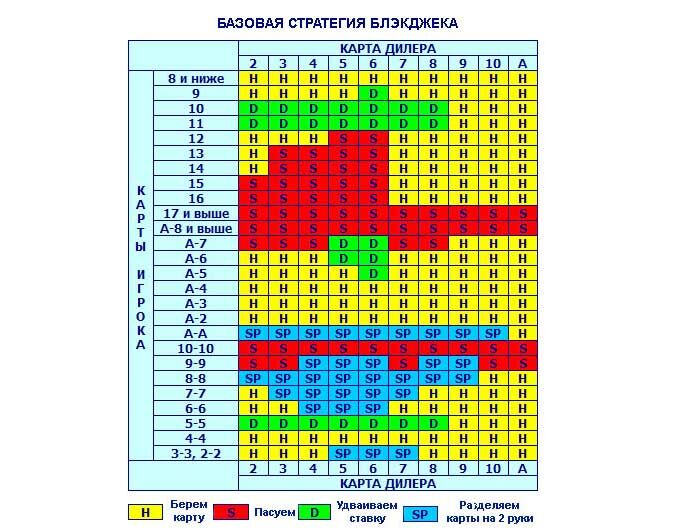

__Обработка парных карт (split)__
```
if player_sum in [4, 6, 8, 10, 12, 14, 16, 18, 20]:
    if player_sum == 16:  # Разделяем две 8-ки
        return 1 if dealer_card <= 6 else 0
    if player_sum == 20:  # Две десятки — никогда не разделяем
        return 0
```

Здесь мы проверяем, имеет ли игрок пару одинаковых карт. Если да, то стратегия зависит от того, какая именно пара у него на руках:
- Если у игрока две 8-ки (сумма 16), то он должен разделить их, если открытая карта дилера меньше или равна 6. В противном случае лучше оставить карты вместе.
- Если у игрока две 10-ки (сумма 20), то разделение крайне невыгодно, поэтому всегда оставляем карты вместе.

__Стратегия для мягких рук (soft hands)__
```
if usable_ace:
    if player_sum >= 19:
        return 0  # Stand
    elif 17 <= player_sum <= 18 and dealer_card in [2, 3, 4, 5, 6]:
        return 1  # Double
    else:
        return 1  # Hit
```

"Мягкая рука" означает, что у игрока есть туз, который может считаться как 1 или 11 очков без риска перебора. Здесь стратегия следующая:
- Если общая сумма очков с учетом мягкого туза больше или равна 19, стоит остановиться (Stand).
- Если сумма находится между 17 и 18 включительно, а открытая карта дилера слабая (2, 3, 4, 5 или 6), то следует удвоить ставку (Double). Это потому, что вероятность того, что дилер переборется, достаточно высока.
- Во всех остальных случаях лучше взять еще одну карту (Hit).

__Стратегия для жестких рук (hard hands)__
```
if player_sum <= 11:
    return 1  # Всегда берем карту
elif player_sum == 12:
    return 1 if dealer_card in [4, 5, 6] else 1
elif 13 <= player_sum <= 16:
    return 0 if dealer_card in [2, 3, 4, 5, 6] else 1
elif player_sum >= 17:
    return 0  # Stand
```
Жесткая рука означает, что у игрока нет туза или туз считается как 1 очко. Стратегия здесь такая:
- Если сумма менее или равна 11, нужно брать карту (Hit), так как риск перебора минимален.
- Если сумма ровно 12, то если карта дилера слабая (4, 5 или 6), стоит взять карту (Hit). Иначе тоже берем карту.
- Если сумма находится между 13 и 16, то если карта дилера слабая (2, 3, 4, 5 или 6), стоит остановиться (Stand). В противном случае берем карту (Hit).
- Если сумма 17 или выше, останавливаемся (Stand), так как вероятность перебора становится слишком высокой.


Если ни одно из условий не сработало, возвращаем значение 1, что соответствует взятию дополнительной карты (Hit).

In [ ]:
def blackjack_strategy(state): #  по таблице
    player_sum, dealer_card, usable_ace = state

    # Пары карт (Split)
    if player_sum in [4, 6, 8, 10, 12, 14, 16, 18, 20]:
        if player_sum == 16:  # Разделяем две 8-ки
            return 1 if dealer_card <= 6 else 0
        if player_sum == 20:  # Две десятки — никогда не разделяем
            return 0

    # Мягкие руки (с тузом)
    if usable_ace:
        if player_sum >= 19:
            return 0  # Stand
        elif 17 <= player_sum <= 18 and dealer_card in [2, 3, 4, 5, 6]:
            return 1  # Double
        else:
            return 1  # Hit

    # Жёсткие руки (без туза)
    if player_sum <= 11:
        return 1  # Всегда берем карту
    elif player_sum == 12:
        return 1 if dealer_card in [4, 5, 6] else 1
    elif 13 <= player_sum <= 16:
        return 0 if dealer_card in [2, 3, 4, 5, 6] else 1
    elif player_sum >= 17:
        return 0  # Stand

    return 1  # По умолчанию Hit

env = gym.make('Blackjack-v1')

N = 10000
wins = 0

for _ in range(N):
    state, _ = env.reset()
    done = False

    while not done:
        action = blackjack_strategy(state)
        state, reward, terminated, truncated, _ = env.step(action)
        done = terminated or truncated

    if reward > 0:  # Подсчитываем победы
        wins += 1

win_rate = wins / N
print(f"Доля выигранных игр по стратегии: {win_rate:.2%}")

Доля выигранных игр по стратегии: 42.29%


#### Cтратегия получше:

Эта версия стратегии фокусируется на различии между мягкими и жёсткими руками, а также на значении карты дилера.

__Стратегия для мягких рук (soft hands)__

Если у игрока мягкая рука (присутствует туз, который может быть использован как 1 или 11 очков), стратегия будет следующей:
- Если сумма очков игрока меньше или равна 17, всегда берётся дополнительная карта (Hit).
- Если сумма составляет 18, то игрок должен решить, стоит ли брать ещё одну карту или остаться на месте (Stand). Если карта дилера 9 или старше, рекомендуется взять дополнительную карту (Hit); иначе стоит остановиться (Stand).
- Если сумма превышает 18, игрок всегда остаётся на месте (Stand).

__Стратегия для жёстких рук (hard hands)__

Для жёсткой руки (у игрока нет туза или туз используется как 1 очко):
- Если сумма очков игрока меньше или равна 11, всегда берётся дополнительная карта (Hit).
- Если сумма составляет 12, то решение зависит от карты дилера. Если карта дилера 7 или старше, берётся дополнительная карта (Hit); иначе стоит остановиться (Stand).
- Если сумма находится в диапазоне от 13 до 16, то если карта дилера слабая (между 2 и 6), игрок останавливается (Stand); в противном случае берётся дополнительная карта (Hit).
- Если сумма 17 или больше, игрок всегда остаётся на месте (Stand).


Если ни одно из предыдущих условий не выполнено, возвращается значение 1, что соответствует взятию дополнительной карты (Hit).

In [ ]:
def blackjack_advanced_strategy(state):
    player_sum, dealer_card, usable_ace = state

    # Мягкие руки (с тузом)
    if usable_ace:
        if player_sum <= 17:  # Берём карту при мягкой руке < 17
            return 1  # Hit
        elif player_sum == 18:
            return 1 if dealer_card >= 9 else 0  # Stand или Hit
        else:
            return 0  # Stand

    # Жёсткие руки (без туза)
    if player_sum <= 11:
        return 1  # Всегда Hit
    elif player_sum == 12:
        return 1 if dealer_card >= 7 else 0
    elif 13 <= player_sum <= 16:
        return 0 if 2 <= dealer_card <= 6 else 1  # Stand против слабого дилера
    else:
        return 0  # Stand при 17+

    return 1  # По умолчанию Hit

env = gym.make('Blackjack-v1')

N = 10000
wins = 0

for _ in range(N):
    state, _ = env.reset()
    done = False

    while not done:
        action = blackjack_advanced_strategy(state)
        state, reward, terminated, truncated, _ = env.step(action)
        done = terminated or truncated

    if reward > 0:
        wins += 1

win_rate = wins / N
print(f"Доля выигранных игр по стратегии: {win_rate:.2%}")

Доля выигранных игр по стратегии: 43.16%


[Текст ссылки](https://)<p class="task" id="3"></p>

### 3\. Создайте окружение для игры в крестики-нолики, реализовав интерфейс `gym.Env`. Решение должно удовлетворять следующим условиям:
* для создания пространства состояний используется `spaces.Box`;
* для создания пространства действий используется `spaces.MultiDiscrete`;
* игра прекращается, если:
    - нет возможности сделать ход;
    - игрок пытается отметить уже выбранную ячейку.
* после каждого хода игрок получает награду:
    - 0, если игра не закончена;
    - 1, если игрок выиграл;
    - -1, если игрок проиграл.
* стратегию выбора действия для второго игрока (машины) определите самостоятельно.

Стратегия поведения машины является частью окружения и должна быть реализована внутри него. Сделайте все соответствующие переменные и методы приватными (названия всех переменных начинаются с `__`), подчеркнув, что у пользователя не должно быть к ним доступа извне.

Сыграйте одну игру, выбирая действия случайным образом. Выведите на экран состояние окружения после каждого хода и итоговую награду пользователя за сессию.

- [ ] Проверено на семинаре

In [ ]:
# идеи для стратегии: если игрок  пытается отметить уже выбранную ячейку, как-то обойти это или поставить ограничение
# прописать конкретную стратегию машины а не случ шаг


In [ ]:
from gym import spaces
import numpy as np

class TicTacToeEnv(gym.Env):
    def __init__(self):
        super(TicTacToeEnv, self).__init__()

        # Размер поля 3x3
        self.__board_size = 3

        # Пространство состояний: матрица 3x3 со значениями [-1, 0, 1]
        self.observation_space = spaces.Box(low=-1, high=1, shape=(self.__board_size, self.__board_size), dtype=np.int8)

        # Пространство действий: два значения хода - (ряд, колонка)
        self.action_space = spaces.MultiDiscrete([self.__board_size, self.__board_size])

        # Инициализация игры
        self.__board = None
        self.__current_player = 1  # 1 - игрок, -1 - машина
        self.__done = False
        self.__winner = None
        self.reset()

    def reset(self): # cбрасывает игру к начальному состоянию

        self.__board = np.zeros((self.__board_size, self.__board_size), dtype=np.int8)
        self.__current_player = 1  # Игрок начинает первым
        self.__done = False
        self.__winner = None
        return self.__board.copy()

    def step(self, action): # oбрабатывает ход игрока и ответный ход машины
        if self.__done:
            raise ValueError("Игра завершена. Вызовите reset().")

        row, col = action
        reward = 0

        # проверка на допустимость хода
        if self.__board[row, col] != 0:
            self.__done = True
            reward = -1  # Штраф за недопустимый ход
            return self.__board.copy(), reward, self.__done, {}

        # ход игрока
        self.__board[row, col] = self.__current_player
        if self.__check_winner(self.__current_player):
            self.__done = True
            reward = 1
            return self.__board.copy(), reward, self.__done, {}

        if self.__is_draw():
            self.__done = True
            reward = 0
            return self.__board.copy(), reward, self.__done, {}

        # ход машины (второй игрок)
        self.__machine_move()
        if self.__check_winner(-self.__current_player):
            self.__done = True
            reward = -1
            return self.__board.copy(), reward, self.__done, {}

        if self.__is_draw():
            self.__done = True
            reward = 0

        return self.__board.copy(), reward, self.__done, {}


    def render(self): # выводит текущее состояние поля на экран
        print(self.__board)

    def __check_winner(self, player): # проверяет наличие победной комбинации

        # gроверка строк, столбцов и диагоналей
        for i in range(self.__board_size):
            if all(self.__board[i, :] == player) or all(self.__board[:, i] == player):
                return True
        if all(np.diag(self.__board) == player) or all(np.diag(np.fliplr(self.__board)) == player):
            return True
        return False

    def __is_draw(self): # проверяет, завершилась ли игра ничьей

        return not (self.__board == 0).any()

    def __machine_move(self): # ход машины: выбирает случайную свободную ячейку

        available_moves = np.argwhere(self.__board == 0)
        if len(available_moves) > 0:
            move = available_moves[np.random.choice(len(available_moves))]
            self.__board[move[0], move[1]] = -self.__current_player

# Играем одну партию, выбирая действия случайно
if __name__ == "__main__":
    env = TicTacToeEnv()
    state = env.reset()
    done = False
    total_reward = 0

    print("Начальное состояние:")
    env.render()

    while not done:
        # Игрок выбирает случайное действие
        action = env.action_space.sample()
        state, reward, done, _ = env.step(action)
        total_reward += reward

        print("\nСостояние после хода:")
        env.render()

    print(f"\nИгра завершена! Итоговая награда: {total_reward}")


Начальное состояние:
[[0 0 0]
 [0 0 0]
 [0 0 0]]

Состояние после хода:
[[ 1  0  0]
 [-1  0  0]
 [ 0  0  0]]

Состояние после хода:
[[ 1  0  0]
 [-1  1  0]
 [-1  0  0]]

Состояние после хода:
[[ 1  0  0]
 [-1  1  1]
 [-1 -1  0]]

Состояние после хода:
[[ 1  0  0]
 [-1  1  1]
 [-1 -1  0]]

Игра завершена! Итоговая награда: -1


In [ ]:
import gym
from gym import spaces
import numpy as np

class TicTacToeEnv(gym.Env):
    def __init__(self):
        super(TicTacToeEnv, self).__init__()

        # Размер поля 3x3
        self.__board_size = 3

        # Пространство состояний: матрица 3x3 со значениями [-1, 0, 1]
        self.observation_space = spaces.Box(low=-1, high=1, shape=(self.__board_size, self.__board_size), dtype=np.int8)

        # Пространство действий: два значения (ряд, колонка)
        self.action_space = spaces.MultiDiscrete([self.__board_size, self.__board_size])

        # Инициализация игры
        self.__board = None
        self.__current_player = 1  # 1 - игрок, -1 - машина
        self.__done = False
        self.__winner = None
        self.reset()

    def reset(self):
        """Сбрасывает игру к начальному состоянию."""
        self.__board = np.zeros((self.__board_size, self.__board_size), dtype=np.int8)
        self.__current_player = 1  # Игрок начинает первым
        self.__done = False
        self.__winner = None
        return self.__board.copy()

    def step(self, action):
        """Обрабатывает ход игрока и ответный ход машины."""
        if self.__done:
            raise ValueError("Игра завершена. Вызовите reset().")

        row, col = action
        reward = 0
        info = {"turn": "player"}  # Добавляем информацию о текущем ходе

        # Проверка на допустимость хода
        if self.__board[row, col] != 0:
            self.__done = True
            reward = -1  # Штраф за недопустимый ход
            return self.__board.copy(), reward, self.__done, info

        # Ход игрока
        self.__board[row, col] = self.__current_player
        if self.__check_winner(self.__current_player):
            self.__done = True
            reward = 1
            return self.__board.copy(), reward, self.__done, info

        if self.__is_draw():
            self.__done = True
            reward = 0
            return self.__board.copy(), reward, self.__done, info

        # Ход машины (второй игрок)
        info["turn"] = "machine"
        machine_move = self.__machine_move()
        if self.__check_winner(-self.__current_player):
            self.__done = True
            reward = -1
            return self.__board.copy(), reward, self.__done, info

        if self.__is_draw():
            self.__done = True
            reward = 0

        return self.__board.copy(), reward, self.__done, info, machine_move

    def render(self):
        """Выводит текущее состояние поля на экран."""
        print(self.__board)

    def __check_winner(self, player):
        """Проверяет наличие победной комбинации."""
        # Проверка строк, столбцов и диагоналей
        for i in range(self.__board_size):
            if all(self.__board[i, :] == player) or all(self.__board[:, i] == player):
                return True
        if all(np.diag(self.__board) == player) or all(np.diag(np.fliplr(self.__board)) == player):
            return True
        return False

    def __is_draw(self):
        """Проверяет, завершилась ли игра ничьей."""
        return not (self.__board == 0).any()

    def __machine_move(self):
        """Ход машины: выбирает случайную свободную ячейку."""
        available_moves = np.argwhere(self.__board == 0)
        if len(available_moves) > 0:
            move = available_moves[np.random.choice(len(available_moves))]
            self.__board[move[0], move[1]] = -self.__current_player
            return move
        return None

# Играем одну партию, выбирая действия случайно
if __name__ == "__main__":
    env = TicTacToeEnv()
    state = env.reset()
    done = False
    total_reward = 0

    print("Начальное состояние:")
    env.render()

    while not done:
        # Игрок выбирает случайное действие
        action = env.action_space.sample()
        print(f"\nХод игрока: {action}")
        state, reward, done, info, machine_move = env.step(action)
        total_reward += reward

        print("Состояние после хода игрока:")
        env.render()

        if done:
            break

        # Ход машины
        print(f"\nХод машины: {machine_move}")
        print("Состояние после хода машины:")
        env.render()

    print(f"\nИгра завершена! Итоговая награда: {total_reward}")


Начальное состояние:
[[0 0 0]
 [0 0 0]
 [0 0 0]]

Ход игрока: [1 0]
Состояние после хода игрока:
[[ 0  0  0]
 [ 1 -1  0]
 [ 0  0  0]]

Ход машины: [1 1]
Состояние после хода машины:
[[ 0  0  0]
 [ 1 -1  0]
 [ 0  0  0]]

Ход игрока: [0 2]
Состояние после хода игрока:
[[ 0  0  1]
 [ 1 -1 -1]
 [ 0  0  0]]

Ход машины: [1 2]
Состояние после хода машины:
[[ 0  0  1]
 [ 1 -1 -1]
 [ 0  0  0]]

Ход игрока: [0 1]
Состояние после хода игрока:
[[ 0  1  1]
 [ 1 -1 -1]
 [ 0 -1  0]]

Ход машины: [2 1]
Состояние после хода машины:
[[ 0  1  1]
 [ 1 -1 -1]
 [ 0 -1  0]]

Ход игрока: [2 0]
Состояние после хода игрока:
[[ 0  1  1]
 [ 1 -1 -1]
 [ 1 -1 -1]]

Ход машины: [2 2]
Состояние после хода машины:
[[ 0  1  1]
 [ 1 -1 -1]
 [ 1 -1 -1]]

Ход игрока: [2 2]


ValueError: not enough values to unpack (expected 5, got 4)

In [ ]:
import gym
from gym import spaces
import numpy as np

class TicTacToeEnv(gym.Env):
    def __init__(self):
        super(TicTacToeEnv, self).__init__()

        # Размер поля 3x3
        self.__board_size = 3

        # Пространство состояний: матрица 3x3 со значениями [-1, 0, 1]
        self.observation_space = spaces.Box(low=-1, high=1, shape=(self.__board_size, self.__board_size), dtype=np.int8)

        # Пространство действий: два значения (ряд, колонка)
        self.action_space = spaces.MultiDiscrete([self.__board_size, self.__board_size])

        # Инициализация игры
        self.__board = None
        self.__current_player = 1  # 1 - игрок, -1 - машина
        self.__done = False
        self.__winner = None
        self.__end_reason = None
        self.reset()

    def reset(self):
        """Сбрасывает игру к начальному состоянию."""
        self.__board = np.zeros((self.__board_size, self.__board_size), dtype=np.int8)
        self.__current_player = 1  # Игрок начинает первым
        self.__done = False
        self.__winner = None
        self.__end_reason = None
        return self.__board.copy()

    def step(self, action):
        """Обрабатывает ход игрока и ответный ход машины."""
        if self.__done:
            raise ValueError("Игра завершена. Вызовите reset().")

        row, col = action
        reward = 0
        info = {"turn": "player"}  # Информация о текущем ходе
        machine_move = None  # Переменная для хода машины

        # Проверка на допустимость хода
        if self.__board[row, col] != 0:
            self.__done = True
            self.__end_reason = "Недопустимый ход. Ячейка занята."
            reward = -1  # Штраф за недопустимый ход
            return self.__board.copy(), reward, self.__done, info, machine_move

        # Ход игрока
        self.__board[row, col] = self.__current_player
        if self.__check_winner(self.__current_player):
            self.__done = True
            reward = 1  # Победа игрока
            self.__end_reason = "Игрок победил!"
            return self.__board.copy(), reward, self.__done, info, machine_move

        if self.__is_draw():
            self.__done = True
            reward = 0  # Ничья
            self.__end_reason = "Ничья!"
            return self.__board.copy(), reward, self.__done, info, machine_move

        # Ход машины (второй игрок)
        info["turn"] = "machine"
        machine_move = self.__machine_move()
        if self.__check_winner(-self.__current_player):
            self.__done = True
            reward = -1  # Победа машины
            self.__end_reason = "Машина победила!"
            return self.__board.copy(), reward, self.__done, info, machine_move

        if self.__is_draw():
            self.__done = True
            reward = 0  # Ничья
            self.__end_reason = "Ничья!"

        return self.__board.copy(), reward, self.__done, info, machine_move

    def render(self):
        """Выводит текущее состояние поля на экран."""
        print(self.__board)

    def __check_winner(self, player):
        """Проверяет наличие победной комбинации."""
        # Проверка строк, столбцов и диагоналей
        for i in range(self.__board_size):
            if all(self.__board[i, :] == player) or all(self.__board[:, i] == player):
                return True
        if all(np.diag(self.__board) == player) or all(np.diag(np.fliplr(self.__board)) == player):
            return True
        return False

    def __is_draw(self):
        """Проверяет, завершилась ли игра ничьей."""
        return not (self.__board == 0).any()

    def __machine_move(self):
        """Ход машины: выбирает случайную свободную ячейку."""
        available_moves = np.argwhere(self.__board == 0)
        if len(available_moves) > 0:
            move = available_moves[np.random.choice(len(available_moves))]
            self.__board[move[0], move[1]] = -self.__current_player
            return move
        return None

# Играем одну партию, выбирая действия случайно
if __name__ == "__main__":
    env = TicTacToeEnv()
    state = env.reset()
    done = False
    total_reward = 0

    print("Начальное состояние:")
    env.render()

    while not done:
        # Игрок выбирает случайное действие
        action = env.action_space.sample()
        print(f"\nХод игрока: {action}")
        state, reward, done, info, machine_move = env.step(action)
        total_reward += reward

        print("Состояние после хода игрока:")
        env.render()

        if done:
            print(f"\n{env._TicTacToeEnv__end_reason}")
            break

        # Ход машины
        print(f"\nХод машины: {machine_move}")
        print("Состояние после хода машины:")
        env.render()

    print(f"\nИгра завершена! Итоговая награда: {total_reward}")


Начальное состояние:
[[0 0 0]
 [0 0 0]
 [0 0 0]]

Ход игрока: [1 1]
Состояние после хода игрока:
[[ 0  0  0]
 [ 0  1  0]
 [-1  0  0]]

Ход машины: [2 0]
Состояние после хода машины:
[[ 0  0  0]
 [ 0  1  0]
 [-1  0  0]]

Ход игрока: [2 2]
Состояние после хода игрока:
[[ 0 -1  0]
 [ 0  1  0]
 [-1  0  1]]

Ход машины: [0 1]
Состояние после хода машины:
[[ 0 -1  0]
 [ 0  1  0]
 [-1  0  1]]

Ход игрока: [0 0]
Состояние после хода игрока:
[[ 1 -1  0]
 [ 0  1  0]
 [-1  0  1]]

Игрок победил!

Игра завершена! Итоговая награда: 1


In [ ]:
if __name__ == "__main__":
    env = TicTacToeEnv()
    state = env.reset()
    done = False
    total_reward = 0

    print("Начальное состояние:")
    env.render()

    while not done:
        # Игрок выбирает случайное действие
        action = env.action_space.sample()
        print(f"\nХод игрока: {action}")
        state, reward, done, info, machine_move = env.step(action)
        total_reward += reward

        print("Состояние после хода игрока:")
        env.render()

        if done:
            print(f"\n{env._TicTacToeEnv__end_reason}")
            break

        # Ход машины
        print(f"\nХод машины: {machine_move}")
        print("Состояние после хода машины:")
        env.render()

    print(f"\nИгра завершена! Итоговая награда: {total_reward}")

Начальное состояние:
[[0 0 0]
 [0 0 0]
 [0 0 0]]

Ход игрока: [2 1]
Состояние после хода игрока:
[[ 0  0  0]
 [-1  0  0]
 [ 0  1  0]]

Ход машины: [1 0]
Состояние после хода машины:
[[ 0  0  0]
 [-1  0  0]
 [ 0  1  0]]

Ход игрока: [2 1]
Состояние после хода игрока:
[[ 0  0  0]
 [-1  0  0]
 [ 0  1  0]]

Недопустимый ход. Ячейка занята.

Игра завершена! Итоговая награда: -1


#### Решение

In [ ]:
import gym
from gym import spaces
import numpy as np

class TicTacToeEnv(gym.Env):
    def __init__(self):
        super(TicTacToeEnv, self).__init__()

        # Размер поля 3x3
        self.__board_size = 3

        # Пространство состояний: матрица 3x3 со значениями [-1, 0, 1]
        self.observation_space = spaces.Box(low=-1, high=1, shape=(self.__board_size, self.__board_size), dtype=np.int8)

        # Пространство действий: два значения (ряд, колонка)
        self.action_space = spaces.MultiDiscrete([self.__board_size, self.__board_size])

        # Инициализация игры
        self.__board = None
        self.__current_player = 1  # 1 - игрок, -1 - машина
        self.__done = False
        self.__winner = None
        self.__end_reason = None
        self.reset()

    def reset(self):
        """Сбрасывает игру к начальному состоянию."""
        self.__board = np.zeros((self.__board_size, self.__board_size), dtype=np.int8)
        self.__current_player = 1  # Игрок начинает первым
        self.__done = False
        self.__winner = None
        self.__end_reason = None
        return self.__board.copy()

    def step(self, action):
        """Обрабатывает ход игрока и ответный ход машины."""
        if self.__done:
            raise ValueError("Игра завершена. Вызовите reset().")

        row, col = action
        reward = 0

        # Проверка на допустимость хода
        if self.__board[row, col] != 0:
            self.__done = True
            reward = -1  # Штраф за недопустимый ход
            self.__end_reason = "Недопустимый ход. Ячейка занята."
            return self.__board.copy(), reward, self.__done, {}

        # Ход игрока
        self.__board[row, col] = self.__current_player
        if self.__check_winner(self.__current_player):
            self.__done = True
            reward = 1
            self.__end_reason = "Игрок победил!"
            return self.__board.copy(), reward, self.__done, {}

        if self.__is_draw():
            self.__done = True
            reward = 0
            self.__end_reason = "Ничья."
            return self.__board.copy(), reward, self.__done, {}

        # Ход машины
        self.__machine_move()
        if self.__check_winner(-self.__current_player):
            self.__done = True
            reward = -1
            self.__end_reason = "Машина победила!"
            return self.__board.copy(), reward, self.__done, {}

        if self.__is_draw():
            self.__done = True
            reward = 0
            self.__end_reason = "Ничья."

        return self.__board.copy(), reward, self.__done, {}


    def render(self):
        """Выводит текущее состояние поля на экран."""
        print(self.__board)

    def __check_winner(self, player):
        """Проверяет наличие победной комбинации."""
        # Проверка строк, столбцов и диагоналей
        for i in range(self.__board_size):
            if all(self.__board[i, :] == player) or all(self.__board[:, i] == player):
                return True
        if all(np.diag(self.__board) == player) or all(np.diag(np.fliplr(self.__board)) == player):
            return True
        return False

    def __is_draw(self):
        """Проверяет, завершилась ли игра ничьей."""
        return not (self.__board == 0).any()

    def __machine_move(self):
        """Ход машины: выбирает случайную свободную ячейку."""
        available_moves = np.argwhere(self.__board == 0)
        if len(available_moves) > 0:
            move = available_moves[np.random.choice(len(available_moves))]
            self.__board[move[0], move[1]] = -self.__current_player
            self.__last_machine_move = [move[0], move[1]]  # Сохраняем последний ход машины

            return move
        return None

if __name__ == "__main__":
    env = TicTacToeEnv()
    state = env.reset()
    # done = False
    total_reward = 0
    step_count = 1  # cчётчик ходов

    print("Начальное состояние:")
    env.render()

    while not done:
        print(f"\nХод {step_count}.", end=" ")

        # Ход игрока
        action = env.action_space.sample()
        print(f"Ход игрока: {action}")
        state, reward, done, info = env.step(action)
        total_reward += reward

        # Проверка завершения игры после хода игрока
        if done:
            print("Состояние после хода игрока:")
            env.render()
            print(f"\nИгра завершена! Причина: {env._TicTacToeEnv__end_reason}")
            break

        # Ход машины
        machine_move = env._TicTacToeEnv__last_machine_move  # Получаем последний ход машины
        print(f"Ход машины: {machine_move}")
        print("Состояние после хода игроков:")
        env.render()

        # Проверка завершения игры после хода машины
        if done:
            print(f"\nИгра завершена! Причина: {env._TicTacToeEnv__end_reason}")
            break

        step_count += 1

    print(f"\nИтоговая награда: {total_reward}")


Начальное состояние:
[[0 0 0]
 [0 0 0]
 [0 0 0]]

Ход 1. Ход игрока: [0 1]
Ход машины: [0, 2]
Состояние после хода игроков:
[[ 0  1 -1]
 [ 0  0  0]
 [ 0  0  0]]

Ход 2. Ход игрока: [0 0]
Ход машины: [1, 0]
Состояние после хода игроков:
[[ 1  1 -1]
 [-1  0  0]
 [ 0  0  0]]

Ход 3. Ход игрока: [1 1]
Ход машины: [2, 0]
Состояние после хода игроков:
[[ 1  1 -1]
 [-1  1  0]
 [-1  0  0]]

Ход 4. Ход игрока: [2 2]
Состояние после хода игрока:
[[ 1  1 -1]
 [-1  1  0]
 [-1  0  1]]

Игра завершена! Причина: Игрок победил!

Итоговая награда: 1


In [ ]:
if __name__ == "__main__":
    env = TicTacToeEnv()
    state = env.reset()
    done = False
    total_reward = 0
    step_count = 1  # Счётчик ходов

    print("Начальное состояние:")
    env.render()

    while not done:
        print(f"\nХод {step_count}.", end=" ")

        # Ход игрока
        action = env.action_space.sample()
        print(f"Ход игрока: {action}")
        state, reward, done, info = env.step(action)
        total_reward += reward

        # Проверка завершения игры после хода игрока
        if done:
            print("Состояние после хода игрока:")
            env.render()
            print(f"\nИгра завершена! Причина: {env._TicTacToeEnv__end_reason}")
            break

        # Ход машины
        machine_move = env._TicTacToeEnv__last_machine_move  # Получаем последний ход машины
        print(f"Ход машины: {machine_move}")
        print("Состояние после хода игроков:")
        env.render()

        # Проверка завершения игры после хода машины
        if done:
            print(f"\nИгра завершена! Причина: {env._TicTacToeEnv__end_reason}")
            break

        step_count += 1

    print(f"\nИтоговая награда: {total_reward}")


Начальное состояние:
[[0 0 0]
 [0 0 0]
 [0 0 0]]

Ход 1. Ход игрока: [1 2]
Ход машины: [0, 2]
Состояние после хода игроков:
[[ 0  0 -1]
 [ 0  0  1]
 [ 0  0  0]]

Ход 2. Ход игрока: [1 0]
Ход машины: [0, 0]
Состояние после хода игроков:
[[-1  0 -1]
 [ 1  0  1]
 [ 0  0  0]]

Ход 3. Ход игрока: [2 1]
Состояние после хода игрока:
[[-1 -1 -1]
 [ 1  0  1]
 [ 0  1  0]]

Игра завершена! Причина: Машина победила!

Итоговая награда: -1


In [ ]:
# обработать вывод после выигрыша машины

In [ ]:
if __name__ == "__main__":
    env = TicTacToeEnv()
    state = env.reset()
    done = False
    total_reward = 0
    step_count = 1  # Счётчик ходов

    print("Начальное состояние:")
    env.render()

    while not done:
        print(f"\nХод {step_count}.", end=" ")

        # Ход игрока
        action = env.action_space.sample()
        print(f"Ход игрока: {action}")
        state, reward, done, info = env.step(action)
        total_reward += reward

        # Ход машины
        machine_move = env._TicTacToeEnv__last_machine_move  # Получаем последний ход машины
        print(f"Ход машины: {machine_move}")
        print("Состояние после хода игроков:")
        env.render()

        # Проверка завершения игры после хода машины
        if done:
            print(f"\nИгра завершена! Причина: {env._TicTacToeEnv__end_reason}")
            break

        step_count += 1

    print(f"\nИтоговая награда: {total_reward}")


Начальное состояние:
[[0 0 0]
 [0 0 0]
 [0 0 0]]

Ход 1. Ход игрока: [0 0]
Ход машины: [0, 2]
Состояние после хода игроков:
[[ 1  0 -1]
 [ 0  0  0]
 [ 0  0  0]]

Ход 2. Ход игрока: [1 1]
Ход машины: [0, 1]
Состояние после хода игроков:
[[ 1 -1 -1]
 [ 0  1  0]
 [ 0  0  0]]

Ход 3. Ход игрока: [2 2]
Ход машины: [0, 1]
Состояние после хода игроков:
[[ 1 -1 -1]
 [ 0  1  0]
 [ 0  0  1]]

Игра завершена! Причина: Игрок победил!

Итоговая награда: 1


In [ ]:
if __name__ == "__main__":
    env = TicTacToeEnv()
    state = env.reset()
    done = False
    total_reward = 0
    step_count = 1  # Счётчик ходов

    print("Начальное состояние:")
    env.render()

    while not done:
        print(f"\nХод {step_count}.", end=" ")

        # Ход игрока
        action = env.action_space.sample()
        print(f"Ход игрока: {action}")
        state, reward, done, info = env.step(action)
        total_reward += reward

        # Ход машины
        machine_move = env._TicTacToeEnv__last_machine_move  # Получаем последний ход машины
        print(f"Ход машины: {machine_move}")
        print("Состояние после хода игроков:")
        env.render()

        # Проверка завершения игры после хода машины
        if done:
            print(f"\nИгра завершена! Причина: {env._TicTacToeEnv__end_reason}")
            break

        step_count += 1

    print(f"\nИтоговая награда: {total_reward}")


Начальное состояние:
[[0 0 0]
 [0 0 0]
 [0 0 0]]

Ход 1. Ход игрока: [2 1]
Ход машины: [1, 2]
Состояние после хода игроков:
[[ 0  0  0]
 [ 0  0 -1]
 [ 0  1  0]]

Ход 2. Ход игрока: [0 2]
Ход машины: [1, 0]
Состояние после хода игроков:
[[ 0  0  1]
 [-1  0 -1]
 [ 0  1  0]]

Ход 3. Ход игрока: [2 2]
Ход машины: [1, 1]
Состояние после хода игроков:
[[ 0  0  1]
 [-1 -1 -1]
 [ 0  1  1]]

Игра завершена! Причина: Машина победила!

Итоговая награда: -1


<p class="task" id="4"></p>

### 4\. Предложите стратегию (в виде алгоритма без использования методов машинного обучения), которая позволит, в среднем, выигрывать в крестики-нолики чаще, чем случайный выбор действия. Реализуйте эту стратегию и сыграйте игру, выбирая действия согласно этой стратегии. Выведите на экран состояние окружения после каждого хода и итоговую награду пользователя за сессию.

- [ ] Проверено на семинаре

In [ ]:
import gym
from gym import spaces
import numpy as np

class TicTacToeEnv(gym.Env):
    def __init__(self):
        super(TicTacToeEnv, self).__init__()

        # Размер поля 3x3
        self._board_size = 3

        # Пространство состояний: матрица 3x3 со значениями [-1, 0, 1]
        self.observation_space = spaces.Box(low=-1, high=1, shape=(self._board_size, self._board_size), dtype=np.int8)

        # Пространство действий: два значения (ряд, колонка)
        self.action_space = spaces.MultiDiscrete([self._board_size, self._board_size])

        # Инициализация игры
        self._board = None
        self._current_player = 1  # 1 - игрок, -1 - машина
        self._done = False
        self._winner = None
        self._end_reason = None
        self.reset()

    def reset(self):
        """Сбрасывает игру к начальному состоянию."""
        self._board = np.zeros((self._board_size, self._board_size), dtype=np.int8)
        self._current_player = 1  # Игрок начинает первым
        self._done = False
        self._winner = None
        self._end_reason = None
        return self._board.copy()

    def step(self, action):
        """Обрабатывает ход игрока и ответный ход машины."""
        if self._done:
            raise ValueError("Игра завершена. Вызовите reset().")

        row, col = action
        reward = 0

        # Проверка на допустимость хода
        if self._board[row, col] != 0:
            self._done = True
            reward = -1  # Штраф за недопустимый ход
            self._end_reason = "Недопустимый ход. Ячейка занята."
            return self._board.copy(), reward, self._done, {}

        # Ход игрока
        self._board[row, col] = self._current_player
        if self._check_winner(self._current_player):
            self._done = True
            reward = 1
            self._end_reason = "Игрок победил!"
            return self._board.copy(), reward, self._done, {}

        if self._is_draw():
            self._done = True
            reward = 0
            self._end_reason = "Ничья."
            return self._board.copy(), reward, self._done, {}

        # Ход машины
        self._machine_move()
        if self._check_winner(-self._current_player):
            self._done = True
            reward = -1
            self._end_reason = "Машина победила!"
            return self._board.copy(), reward, self._done, {}

        if self._is_draw():
            self._done = True
            reward = 0
            self._end_reason = "Ничья."

        return self._board.copy(), reward, self._done, {}

    def render(self):
        """Выводит текущее состояние поля на экран."""
        print(self._board)

    def _check_winner(self, player):
        """Проверяет наличие победной комбинации."""
        # Проверка строк, столбцов и диагоналей
        for i in range(self._board_size):
            if all(self._board[i, :] == player) or all(self._board[:, i] == player):
                return True
        if all(np.diag(self._board) == player) or all(np.diag(np.fliplr(self._board)) == player):
            return True
        return False

    def _is_draw(self):
        """Проверяет, завершилась ли игра ничьей."""
        return not (self._board == 0).any()

    def _machine_move(self):
        """Ход машины: выбирает случайную свободную ячейку."""
        available_moves = np.argwhere(self._board == 0)
        if len(available_moves) > 0:
            move = available_moves[np.random.choice(len(available_moves))]
            self._board[move[0], move[1]] = -self._current_player
            self._last_machine_move = [move[0], move[1]]  # Сохраняем последний ход машины
            return move
        return None

if __name__ == "__main__":
    env = TicTacToeEnv()
    state = env.reset()
    done = False
    total_reward = 0
    step_count = 1  # Счётчик ходов

    print("Начальное состояние:")
    env.render()

    while not done:
        print(f"\nХод {step_count}.", end=" ")

        # Ход игрока
        action = env.action_space.sample()
        print(f"Ход игрока: {action}")
        state, reward, done, info = env.step(action)
        total_reward += reward

        # Ход машины
        machine_move = env._last_machine_move  # Получаем последний ход машины
        print(f"Ход машины: {machine_move}")
        print("Состояние после хода игроков:")
        env.render()

        # Проверка завершения игры после хода машины
        if done:
            print(f"\nИгра завершена! Причина: {env._end_reason}")
            break

        step_count += 1

    print(f"\nИтоговая награда: {total_reward}")

Начальное состояние:
[[0 0 0]
 [0 0 0]
 [0 0 0]]

Ход 1. Ход игрока: [1 1]
Ход машины: [0, 0]
Состояние после хода игроков:
[[-1  0  0]
 [ 0  1  0]
 [ 0  0  0]]

Ход 2. Ход игрока: [1 0]
Ход машины: [2, 0]
Состояние после хода игроков:
[[-1  0  0]
 [ 1  1  0]
 [-1  0  0]]

Ход 3. Ход игрока: [2 2]
Ход машины: [1, 2]
Состояние после хода игроков:
[[-1  0  0]
 [ 1  1 -1]
 [-1  0  1]]

Ход 4. Ход игрока: [2 1]
Ход машины: [0, 2]
Состояние после хода игроков:
[[-1  0 -1]
 [ 1  1 -1]
 [-1  1  1]]

Ход 5. Ход игрока: [0 1]
Ход машины: [0, 2]
Состояние после хода игроков:
[[-1  1 -1]
 [ 1  1 -1]
 [-1  1  1]]

Игра завершена! Причина: Игрок победил!

Итоговая награда: 1


Этот метод отвечает за выбор следующего хода игрока на основе текущей ситуации на игровом поле. Он включает несколько шагов, каждый из которых проверяется последовательно.

__Вспомогательные методы__
Метод __get_available_moves возвращает список доступных ходов, а метод __is_winning_move проверяет, приводит ли конкретный ход к победе для заданного игрока.

 1. Проверка на победный ход
На этом этапе программа просматривает все доступные ходы и проверяет, приведет ли какой-то из них к немедленной победе текущего игрока. Если такой ход найден, он сразу же возвращается.

2. Блокировка победы противника
Если текущий игрок не может выиграть немедленно, он пытается предотвратить победу оппонента. Для этого проверяются все возможные ходы, и если найдется ход, который предотвратит победу соперника, он выбирается.

3. Занятие центра
Если предыдущие шаги не привели к выбору хода, и центр игрового поля еще свободен, стратегия выбирает центр. Центр является стратегически важным местом, поскольку он увеличивает количество возможных вариантов для победы.

4. Занятие угла
Если центр уже занят, стратегия выбирает любой свободный угол. Углы также являются важными позициями, которые могут дать преимущество в игре.

5. Случайный ход
Если ни одна из предыдущих проверок не привела к выбору хода, стратегия просто выбирает случайный доступный ход. Этот шаг гарантирует, что игра продолжится, даже если все предыдущие условия не выполнены.

In [ ]:
class TicTacToeEnvWithStrategy(TicTacToeEnv):
    def player_strategy(self):
        """Стратегия игрока для выбора хода."""
        # 1. Проверить, есть ли победный ход
        for move in self.__get_available_moves():
            if self.__is_winning_move(move, self._current_player):
                return move

        # 2. Заблокировать победу противника
        for move in self.__get_available_moves():
            if self.__is_winning_move(move, -self._current_player):
                return move

        # 3. Занять центр, если свободен
        center = (1, 1)
        if self._board[center] == 0:
            return center

        # 4. Занять один из углов
        for corner in [(0, 0), (0, 2), (2, 0), (2, 2)]:
            if self._board[corner] == 0:
                return corner

        # 5. Выбрать случайный ход
        return self.__get_available_moves()[np.random.choice(len(self.__get_available_moves()))]

    def __get_available_moves(self):
        """Возвращает список доступных ходов."""
        return list(map(tuple, np.argwhere(self._board == 0)))

    def __is_winning_move(self, move, player):
        """Проверяет, приводит ли ход `move` игрока `player` к победе."""
        temp_board = self._board.copy()
        temp_board[move] = player
        return self._check_winner(player)


if __name__ == "__main__":
    env = TicTacToeEnvWithStrategy()
    state = env.reset()
    done = False
    total_reward = 0
    step_count = 1

    print("Начальное состояние:")
    env.render()

    while not done:
        print(f"\nХод {step_count}.")

        # Ход игрока с использованием стратегии
        action = env.player_strategy()
        print(f"Ход игрока: {action}")
        state, reward, done, info = env.step(action)
        total_reward += reward

        # Проверка завершения игры после хода игрока
        if done:
            print(f"\nИгра завершена! Причина: {env._end_reason}")
            break

        # Ход машины
        machine_move = env._last_machine_move
        print(f"Ход машины: {machine_move}")
        print("Состояние после хода игроков:")
        env.render()

        # Проверка завершения игры после хода машины
        if done:
            print(f"\nИгра завершена! Причина: {env._end_reason}")
            break

        step_count += 1

    print(f"\nИтоговая награда: {total_reward}")


Начальное состояние:
[[0 0 0]
 [0 0 0]
 [0 0 0]]

Ход 1.
Ход игрока: (1, 1)
Ход машины: [1, 0]
Состояние после хода игроков:
[[ 0  0  0]
 [-1  1  0]
 [ 0  0  0]]

Ход 2.
Ход игрока: (0, 0)
Ход машины: [0, 1]
Состояние после хода игроков:
[[ 1 -1  0]
 [-1  1  0]
 [ 0  0  0]]

Ход 3.
Ход игрока: (0, 2)
Ход машины: [1, 2]
Состояние после хода игроков:
[[ 1 -1  1]
 [-1  1 -1]
 [ 0  0  0]]

Ход 4.
Ход игрока: (2, 0)

Игра завершена! Причина: Игрок победил!

Итоговая награда: 1


<p class="task" id="5"></p>

### 5\. Создайте окружение `MountainCar-v0`. Проиграйте 10 эпизодов и сохраните на диск файл с записью каждого пятого эпизода. Для записи видео воспользуйтесь обёрткой `RecordVideo`. Вставьте скриншот, на котором видно, что файлы были созданы.

- [ ] Проверено на семинаре

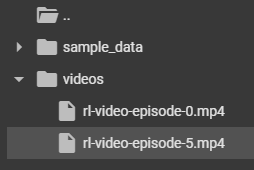

In [ ]:
from gymnasium.wrappers import RecordVideo
import os

env = gym.make("MountainCar-v0", render_mode="rgb_array")

video_folder = "./videos/"
if not os.path.exists(video_folder):
    os.makedirs(video_folder)

env = RecordVideo(env, video_folder=video_folder, episode_trigger=lambda x: x % 5 == 0)

for episode in range(10):
    state, _ = env.reset()
    done = False
    total_reward = 0

    while not done:
        action = env.action_space.sample()  # Случайное действие
        state, reward, done, truncated, _ = env.step(action)
        total_reward += reward
        if done or truncated:
            print(f"Эпизод {episode + 1} завершён. Награда: {total_reward}")
            break

env.close()
print(f"Видео сохранено в директорию: {video_folder}")


/usr/local/lib/python3.10/dist-packages/gymnasium/wrappers/rendering.py:283: UserWarning: WARN: Overwriting existing videos at /content/videos folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(


Эпизод 1 завершён. Награда: -200.0
Эпизод 2 завершён. Награда: -200.0
Эпизод 3 завершён. Награда: -200.0
Эпизод 4 завершён. Награда: -200.0
Эпизод 5 завершён. Награда: -200.0
Эпизод 6 завершён. Награда: -200.0
Эпизод 7 завершён. Награда: -200.0
Эпизод 8 завершён. Награда: -200.0
Эпизод 9 завершён. Награда: -200.0
Эпизод 10 завершён. Награда: -200.0
Видео сохранено в директорию: ./videos/


In [ ]:
import gym
from gym.wrappers import RecordVideo
import os

env = gym.make("MountainCar-v0", render_mode="rgb_array")

video_folder = "./videos/"
if not os.path.exists(video_folder):
    os.makedirs(video_folder)

env = RecordVideo(env, video_folder=video_folder, episode_trigger=lambda x: x % 5 == 0)

for episode in range(10):
    state = env.reset()
    done = False
    total_reward = 0

    while not done:
        position, velocity = state
        # Если машина движется влево, ускоряться влево
        if velocity < 0:
            action = 0  # Ускоряться влево
        # Если машина находится в нижней части (отрицательное положение), ускоряться вправо
        elif position < 0:
            action = 2  # Ускоряться вправо
        # Если машина находится в верхней части (положительное положение), ускоряться вправо
        else:
            action = 2  # Ускоряться вправо

        state, reward, done, _ = env.step(action)
        total_reward += reward
        if done:
            print(f"Эпизод {episode + 1} завершён. Награда: {total_reward}")
            break

env.close()
print(f"Видео сохранено в директорию: {video_folder}")


/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/record_video.py:78: UserWarning: WARN: Overwriting existing videos at /content/videos folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(
/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:241: DeprecationWarning: `np.bool8` is a deprecated alias for `np.b

Эпизод 1 завершён. Награда: -119.0
Эпизод 2 завершён. Награда: -121.0
Эпизод 3 завершён. Награда: -121.0
Эпизод 4 завершён. Награда: -114.0
Эпизод 5 завершён. Награда: -123.0
Эпизод 6 завершён. Награда: -122.0
Эпизод 7 завершён. Награда: -115.0
Эпизод 8 завершён. Награда: -123.0
Эпизод 9 завершён. Награда: -114.0
Эпизод 10 завершён. Награда: -114.0
Видео сохранено в директорию: ./videos/


In [ ]:
print(env.action_space)
print(env.action_space.sample())
print(env.reset()[0])

Discrete(3)
0
[-0.4527472  0.       ]


[position, velocity]

1. Положение автомобиля (position) на оси X.
2. Скорость автомобиля (velocity) вдоль этой оси.

0. Автомобиль толкает влево (т.е. пытается двигаться против направления наклона горы).
1. Никаких усилий со стороны автомобиля (он просто катится под действием силы тяжести).
2. Автомобиль толкает вправо (вверх по склону горы).

/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/record_video.py:78: UserWarning: WARN: Overwriting existing videos at /content/videos folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(
/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:241: DeprecationWarning: `np.bool8` is a deprecated alias for `np.b

Эпизод 1 завершён. Награда: -124.0
Эпизод 2 завершён. Награда: -121.0
Эпизод 3 завершён. Награда: -115.0
Эпизод 4 завершён. Награда: -125.0
Эпизод 5 завершён. Награда: -123.0
Эпизод 6 завершён. Награда: -114.0
Эпизод 7 завершён. Награда: -118.0
Эпизод 8 завершён. Награда: -116.0
Эпизод 9 завершён. Награда: -121.0
Эпизод 10 завершён. Награда: -123.0


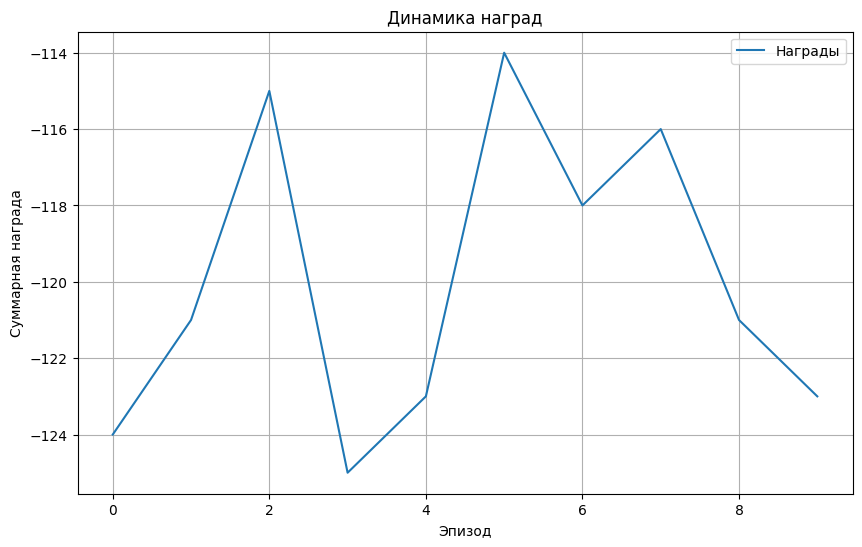

Видео сохранено в директорию: ./videos/


In [ ]:
import gym
from gym.wrappers import RecordVideo
import os
import matplotlib.pyplot as plt

# Создаем окружение и настраиваем запись видео
env = gym.make("MountainCar-v0", render_mode="rgb_array")

video_folder = "./videos/"
if not os.path.exists(video_folder):
    os.makedirs(video_folder)

env = RecordVideo(env, video_folder=video_folder, episode_trigger=lambda x: x % 5 == 0)

# Список для хранения суммарной награды за каждый эпизод
rewards_history = []

# Основной цикл обучения
for episode in range(10):  # Увеличим количество эпизодов для лучшего понимания динамики
    state = env.reset()
    done = False
    total_reward = 0

    while not done:
        position, velocity = state

        # Логика принятия решений
        if velocity < 0:
            action = 0  # Ускоряться влево
        elif position < 0:
            action = 2  # Ускоряться вправо
        else:
            action = 2  # Ускоряться вправо

        state, reward, done, _ = env.step(action)
        total_reward += reward

    rewards_history.append(total_reward)

    if done:
        print(f"Эпизод {episode + 1} завершён. Награда: {total_reward}")

# Закрываем окружение
env.close()

# Строим график наград
plt.figure(figsize=(10, 6))
plt.plot(rewards_history, label='Награды')
plt.xlabel('Эпизод')
plt.ylabel('Суммарная награда')
plt.title('Динамика наград')
plt.legend()
plt.grid(True)
plt.show()

print(f"Видео сохранено в директорию: {video_folder}")

## Обратная связь
- [ ] Хочу получить обратную связь по решению